In [4]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("D:\Ganesh\ML_AI\Decision tree\DecisionTrees\data\diabetes\diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
train_data = df.sample(frac=0.7)

In [9]:
train_index = list(train_data.index)

In [10]:
test_data = df.drop(train_index)

In [11]:
test_index = list(test_data.index)

In [12]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [13]:
x_test = test_data[features]

In [14]:
y_test = test_data['Outcome']

In [15]:
x_train = train_data[features]
y_train = train_data['Outcome']

#### Entropy Metric - Best Split

In [16]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=1)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

[Text(0.5, 0.75, 'Glucose <= 123.5\nentropy = 0.946\nsamples = 538\nvalue = [342, 196]'),
 Text(0.25, 0.25, 'entropy = 0.722\nsamples = 315\nvalue = [252, 63]'),
 Text(0.75, 0.25, 'entropy = 0.973\nsamples = 223\nvalue = [90, 133]')]

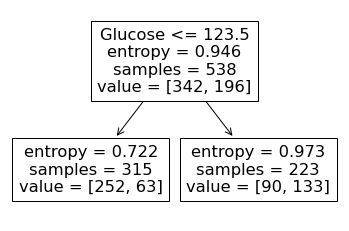

In [17]:
tree.plot_tree(dtree,feature_names=features)

#### Gini Metric - Best Split

In [30]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=1)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'Glucose <= 123.5\ngini = 0.463\nsamples = 538\nvalue = [342, 196]'),
 Text(0.25, 0.25, 'gini = 0.32\nsamples = 315\nvalue = [252, 63]'),
 Text(0.75, 0.25, 'gini = 0.481\nsamples = 223\nvalue = [90, 133]')]

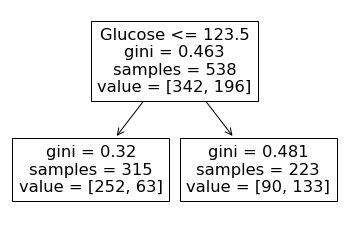

In [31]:
tree.plot_tree(dtree,feature_names=features)

#### Entropy Metric - Random Split

In [28]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=1,splitter="random")
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, splitter='random')

[Text(0.5, 0.75, 'Glucose <= 128.593\nentropy = 0.946\nsamples = 538\nvalue = [342, 196]'),
 Text(0.25, 0.25, 'entropy = 0.779\nsamples = 351\nvalue = [270, 81]'),
 Text(0.75, 0.25, 'entropy = 0.962\nsamples = 187\nvalue = [72, 115]')]

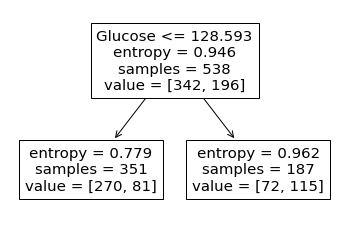

In [29]:
tree.plot_tree(dtree,feature_names=features)

#### Gini Metric - Random Split

In [26]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=1,splitter="random")
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1, splitter='random')

[Text(0.5, 0.75, 'Pregnancies <= 2.609\ngini = 0.463\nsamples = 538\nvalue = [342, 196]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 248\nvalue = [186, 62]'),
 Text(0.75, 0.25, 'gini = 0.497\nsamples = 290\nvalue = [156, 134]')]

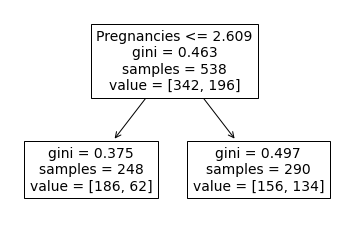

In [27]:
tree.plot_tree(dtree,feature_names=features)